In [18]:
# Select algorithm to use as machine learner
# 0 = Linear Regression
# 1 = SVR  (not recommended - too slow)
# 2 = Decision Tree
# 3 = Random Forest
# 4 = XGBoost

algorithm_choice = 3

#Check a valid choice of algorithm has been made
assert algorithm_choice in [0,1,2,3,4]

In [19]:
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

print "Import successful"

Import successful


In [20]:
try:
    data = pd.read_csv("train.csv")
    
    print "Russian housing training dataset has {} samples with {} features each.".format(*data.shape)
    
except:
    print "Dataset(s) could not be loaded. Please check filename is correct and dataset exists"

Russian housing training dataset has 30471 samples with 292 features each.


In [21]:
print "Display sample of training data:"
display(data.head())

Display sample of training data:


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [22]:
print "Display statistics about training data:"
display(data.describe())

Display statistics about training data:


,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
count,30471.000000,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,15237.917397,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,...,32.058318,10.783860,1.771783,15.045552,30.251518,0.442421,8.648814,52.796593,5.987070,7.123035e+06
std,8796.501536,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,...,73.465611,28.385679,5.418807,29.118668,47.347938,0.609269,20.580741,46.292660,4.889219,4.780111e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05
25%,7620.500000,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,1.000000,0.000000,2.000000,9.000000,0.000000,0.000000,11.000000,1.000000,4.740002e+06
50%,15238.000000,49.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.000000,2.000000,0.000000,7.000000,16.000000,0.000000,2.000000,48.000000,5.000000,6.274411e+06
75%,22855.500000,63.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.000000,5.000000,1.000000,12.000000,28.000000,1.000000,7.000000,76.000000,10.000000,8.300000e+06
max,30473.000000,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,...,377.000000,147.000000,30.000000,151.000000,250.000000,2.000000,106.000000,218.000000,21.000000,1.111111e+08


life_sq       0.264987
floor         0.005511
max_floor     0.458012
material      0.458012
build_year    0.806652
dtype: float64

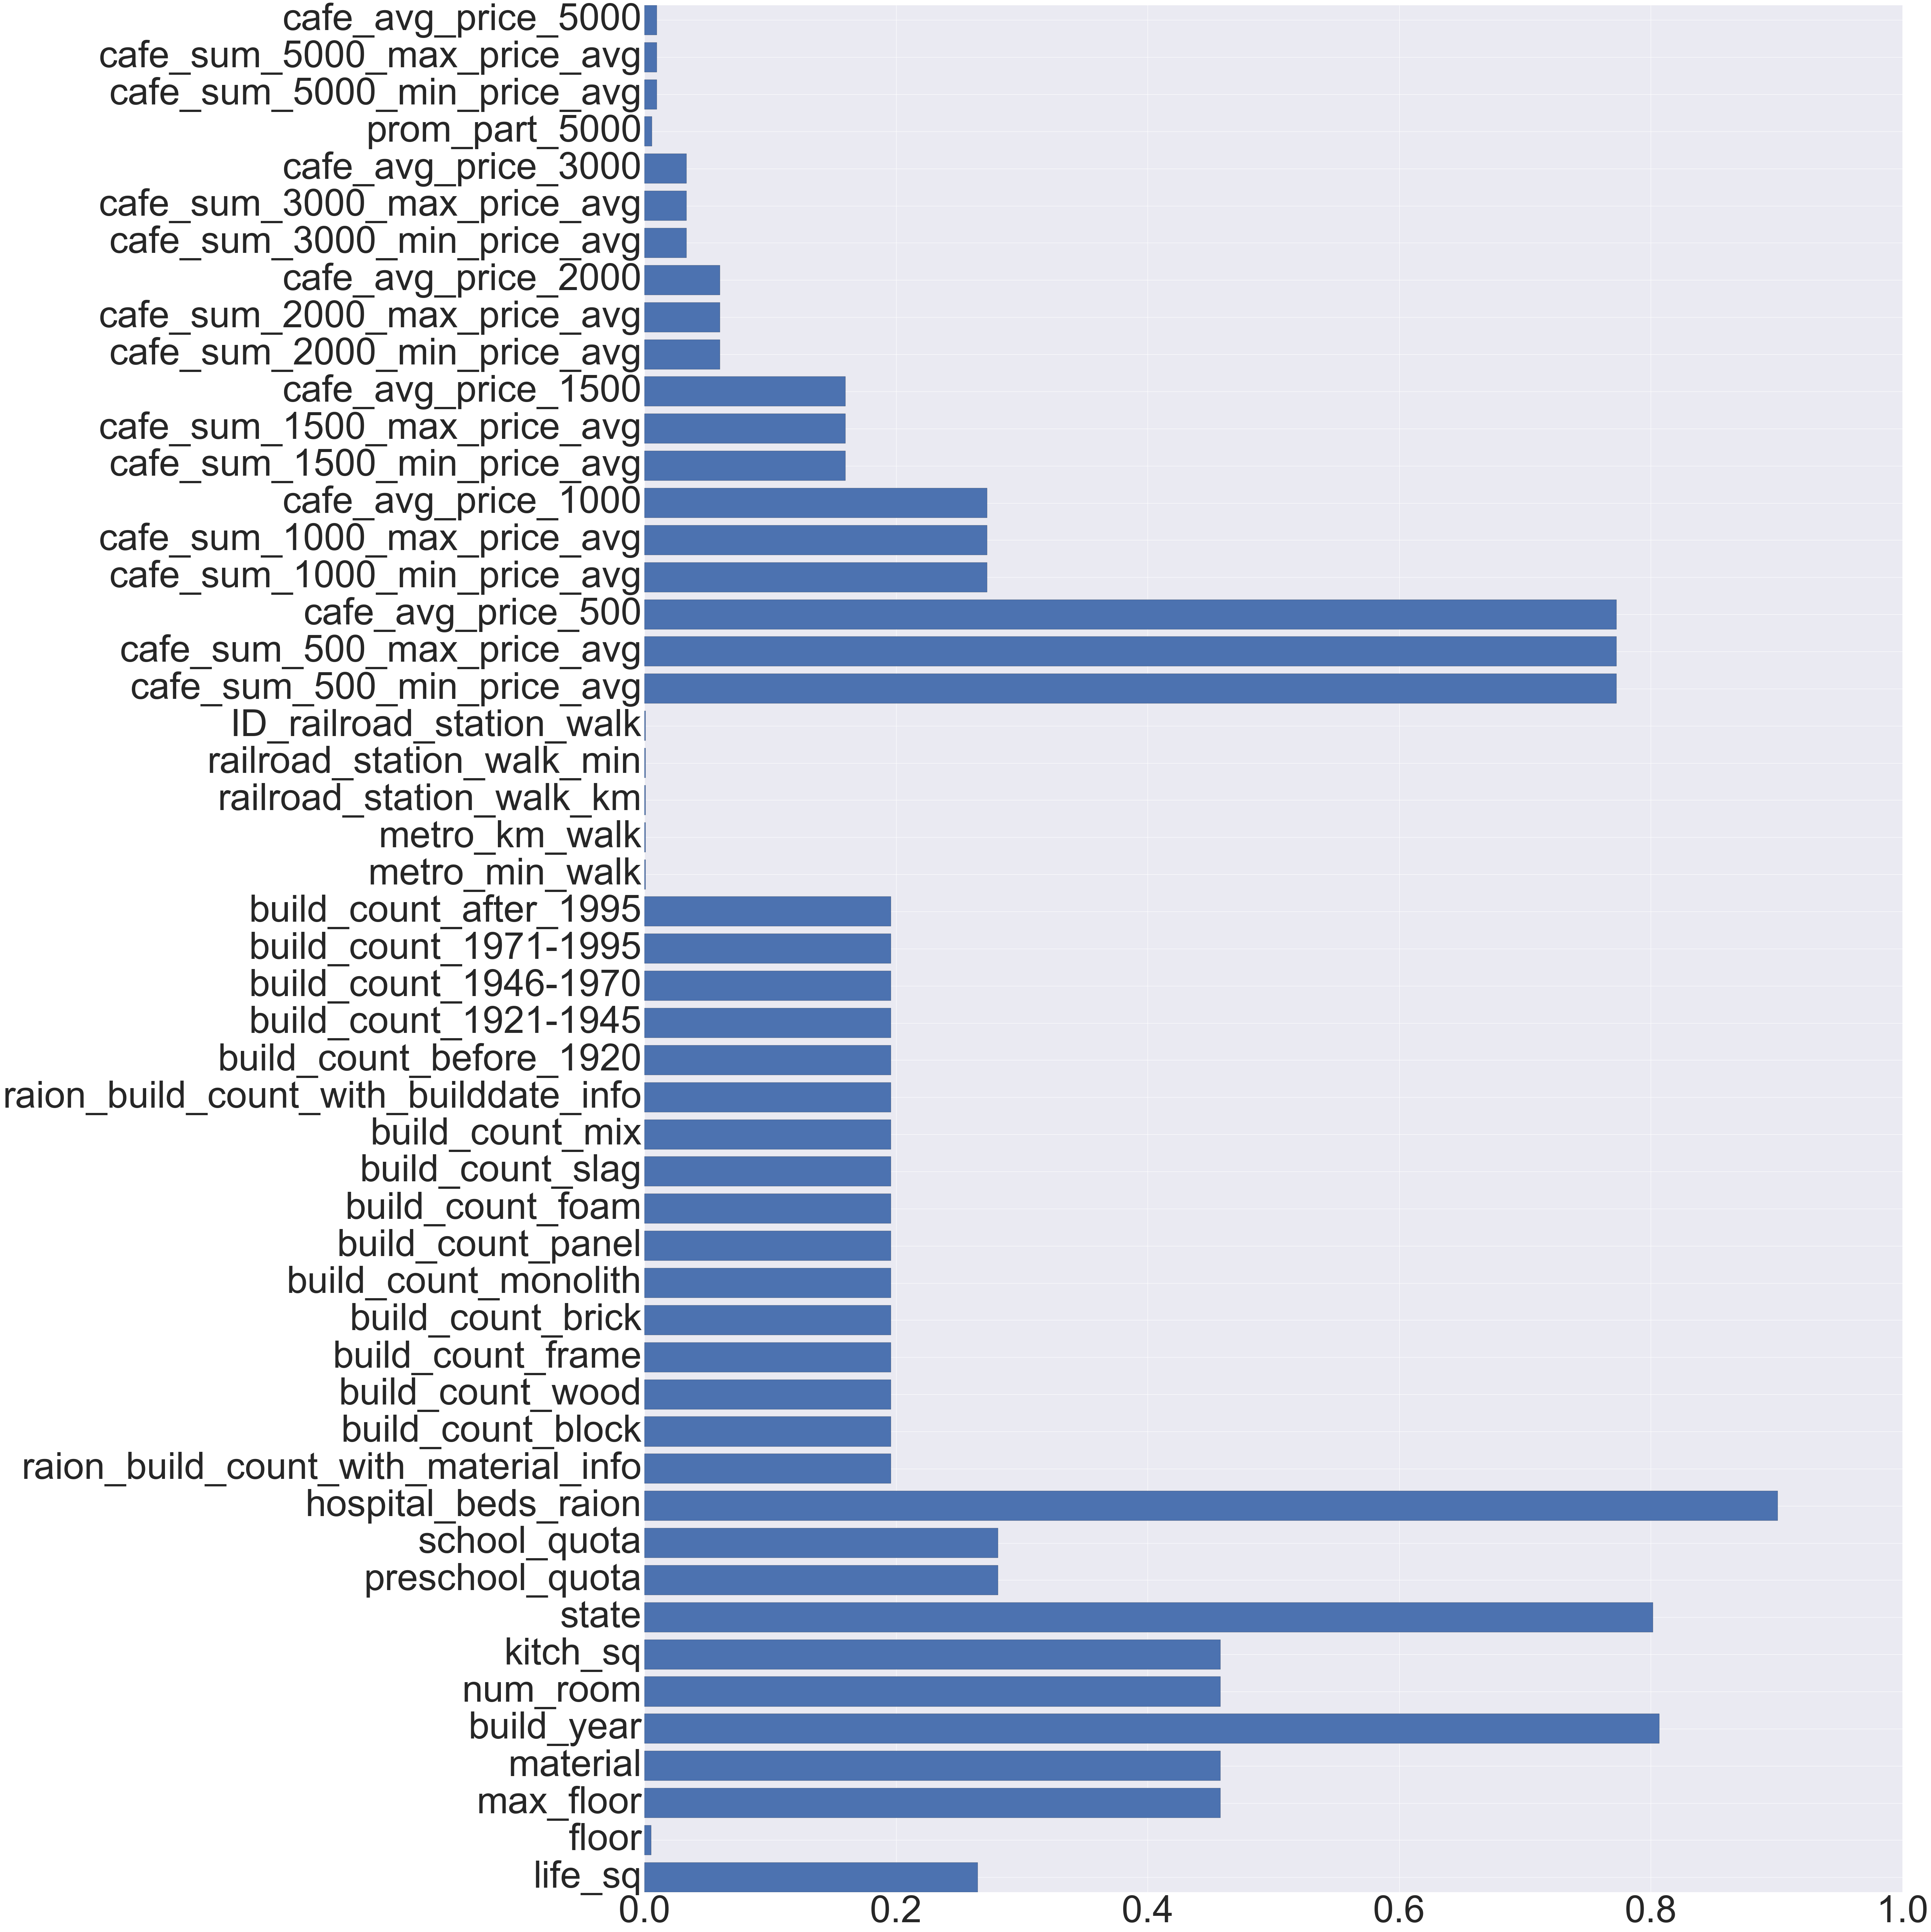

In [70]:
#Ref: http://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-the-column-in-panda-data-frame

nan_counts = data.isnull().sum()
nan_ratios = nan_counts / data.count()
nan_ratios.columns = ["Feature", "Ratio NaN"]
nan_ratios = nan_ratios[nan_ratios > 0]
display(nan_ratios.head())

plt.figure(1)
plt.figure(figsize = (60,90))
plt.tick_params(axis='both', which='major', labelsize=100)
ind = np.arange(nan_ratios.count())
plt.yticks(ind, nan_ratios.index)
plt.barh(ind, nan_ratios, align = "center")
plt.show()

In [23]:
#remove unwanted columns, drop nans & split into features and results
data.drop(['id', 'timestamp'], axis = 1, inplace = True)
data_final = data[list(data.select_dtypes(include=['float64', 'int64']).columns)]

data_final.dropna(how = "any", axis = 0, inplace = True)
print "After removing NaN Russian housing training dataset has {} samples with {} features each.".format(*data_final.shape)

results = data_final['price_doc']
features = data_final.drop('price_doc',axis = 1)

#check training features and results are as expected
display(results.head())
display(features.head())

After removing NaN Russian housing training dataset has 6042 samples with 275 features each.


/Users/Adam/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


8056     2750000
8154     7100000
8287    11700000
8387    10400000
8391     6200000
Name: price_doc, dtype: int64

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
8056,11,11.0,2.0,5.0,2.0,1907.0,1.0,12.0,3.0,1.007156e+07,...,562,339,135,26,133,207,1,89,161,10
8154,45,27.0,6.0,9.0,1.0,1970.0,2.0,6.0,3.0,8.889467e+06,...,12,2,1,0,3,8,1,0,19,3
8287,77,50.0,3.0,5.0,2.0,1957.0,3.0,8.0,2.0,4.662813e+06,...,316,214,85,21,48,89,1,54,146,12
8387,56,29.0,5.0,16.0,5.0,1987.0,2.0,10.0,2.0,1.803644e+07,...,112,74,32,8,19,34,0,10,121,7
8391,31,21.0,5.0,9.0,5.0,1962.0,1.0,5.0,3.0,1.880000e+07,...,155,99,43,8,17,41,1,18,93,5


In [24]:
#from sklearn.preprocessing import OneHotEncoder
#enc = OneHotEncoder()

#features_one_hot = pd.get_dummies(features, columns = ["water_1line", "product_type", "sub_area", "culture_objects_top_25", "thermal_power_plant_raion", "incineration_raion", "oil_chemistry_raion", "radiation_raion", "railroad_terminal_raion", "big_market_raion", "nuclear_reactor_raion", "detention_facility_raion", "big_road1_1line", "railroad_1line", "ecology"])
#features_one_hot.to_csv("features_one_hot.csv")

In [25]:
from sklearn.cross_validation import train_test_split

#Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, results, test_size = 0.2, random_state = 17)

print "Training and testing split was successful."

Training and testing split was successful.


In [26]:
def performance_metric(y_true, y_predict):
    """ Calculate and return the RMSLE score between true and predicted values."""
  
    score = np.sqrt(np.mean(np.square(np.log(y_predict + 1) - np.log(y_true + 1))))
    
    # Return the score
    return score

In [27]:
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import ShuffleSplit

def fit_model(X, y, verbose):
    """ Perform grid search over the 'max_depth' parameter for a decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    
    if verbose:
        print "DEBUG - making cv_sets"
    
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)
    
    if verbose:
        print "DEBUG - making regressor"
    
    if algorithm_choice == 0:    #Linear Regression
        regressor = LinearRegression()
        params = {'fit_intercept':(True, False)}
        
    elif algorithm_choice == 1:  #SVR
        regressor = svm.SVR()
        params = {'C': (1,10)}
        
    elif algorithm_choice == 2:  #Decision Tree
        regressor = DecisionTreeRegressor()
        params = {'max_depth':(2,5,10, None)}
        
    elif algorithm_choice == 3:  #Random Forest
        regressor = RandomForestRegressor(n_estimators = 10)
        params = {'max_depth':(20,30)}
        #params = {'max_depth':(2,5,10, None), 'min_samples_split':(1,2,3,4)} 
          

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    if verbose:
        print "DEBUG - making scorer"
    scoring_fnc = make_scorer(performance_metric)
    
    if verbose:
        print "DEBUG - starting gridsearch"
        print_freq = 1
    else:
        print_freq = 0
    # Create the grid search object
    grid = GridSearchCV(estimator = regressor, param_grid = params, scoring = scoring_fnc, cv = cv_sets, verbose = print_freq)
    
    if verbose:
        print "DEBUG - finished gridsearch, starting fit"
    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)
    
    if verbose:    
        print "DEBUG - finished fit"

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [28]:
if algorithm_choice != 4: #calculate test predictions (in case of any algorithms except XGBoost)

    # Fit the training data to the model using grid search

    print "DEBUG - calling fit_model"
    reg = fit_model(X_train, y_train, verbose = True)

    # Print the optimal model parameters
    print "Optimal model parameters: ", reg.get_params()
    
else:
    print "Skipping since using XGBoost"

DEBUG - calling fit_model
DEBUG - making cv_sets
DEBUG - making regressor
DEBUG - making scorer
DEBUG - starting gridsearch
DEBUG - finished gridsearch, starting fit
Fitting 10 folds for each of 2 candidates, totalling 20 fits
DEBUG - finished fit
Optimal model parameters:  {'warm_start': False, 'oob_score': False, 'n_jobs': 1, 'verbose': 0, 'max_leaf_nodes': None, 'bootstrap': True, 'min_samples_leaf': 1, 'n_estimators': 10, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'criterion': 'mse', 'random_state': None, 'max_features': 'auto', 'max_depth': 30}


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.4min finished


In [29]:
if algorithm_choice != 4: #calculate test predictions (in case of any algorithms except XGBoost)
    display(X_test.head(10))
    preds_train = reg.predict(X_train)
    preds_test = reg.predict(X_test)
    #display(preds_train[:10])
    
    score_train = performance_metric(y_train, preds_train)
    score_test = performance_metric(y_test, preds_test)

    print "Score on training set:", score_train
    print "Score on testing set:", score_test
else:
    print "Skipping since using XGBoost"

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
22243,45,27.0,6.0,12.0,1.0,1972.0,2.0,6.0,3.0,1.032047e+07,...,326,202,66,9,80,148,1,53,153,10
28525,62,62.0,4.0,4.0,1.0,0.0,3.0,1.0,1.0,7.307411e+06,...,636,371,141,26,150,249,2,105,203,13
26979,61,34.0,18.0,22.0,1.0,2011.0,2.0,10.0,3.0,5.686537e+06,...,220,115,31,4,67,102,1,44,120,10
15112,33,17.0,10.0,12.0,2.0,1962.0,1.0,7.0,2.0,5.234028e+06,...,185,119,28,7,40,91,1,32,129,11
10700,65,43.0,3.0,12.0,1.0,1972.0,3.0,7.0,2.0,1.880000e+07,...,74,39,12,2,9,28,2,6,93,3
25847,32,18.0,6.0,9.0,1.0,1970.0,1.0,6.0,2.0,8.338438e+06,...,27,15,2,0,12,17,0,3,69,3
10965,39,20.0,22.0,22.0,1.0,2003.0,1.0,10.0,3.0,5.391434e+06,...,77,26,4,1,10,34,2,10,74,10
14486,46,46.0,13.0,13.0,6.0,2014.0,1.0,0.0,1.0,7.307411e+06,...,636,371,141,26,150,249,2,105,203,13
27594,38,18.0,11.0,16.0,5.0,1987.0,1.0,9.0,3.0,5.235177e+07,...,23,18,13,1,8,18,1,2,52,1
22223,34,17.0,6.0,12.0,5.0,1969.0,1.0,10.0,2.0,4.395333e+06,...,25,7,2,0,8,19,0,10,59,11


Score on training set: 0.322849697344
Score on testing set: 0.553478364877


In [30]:
#Load the competition testing data set

try:
    test_data = pd.read_csv("test.csv")
    
    print "Russian housing prices competion test dataset has {} samples with {} features each.".format(*test_data.shape)
    
except:
    print "Dataset(s) could not be loaded. Please check filename is correct and dataset exists"

Russian housing prices competion test dataset has 7662 samples with 291 features each.


In [31]:
test_data.fillna(value = 0, axis = 0, inplace = True)
ids = test_data['id']
test_data.drop(['id', 'timestamp'], axis = 1, inplace = True)
test_final = test_data[list(test_data.select_dtypes(include=['float64', 'int64']).columns)]

#test_data_one_hot = pd.get_dummies(test_data, columns = ["water_1line", "product_type", "sub_area", "culture_objects_top_25", "thermal_power_plant_raion", "incineration_raion", "oil_chemistry_raion", "radiation_raion", "railroad_terminal_raion", "big_market_raion", "nuclear_reactor_raion", "detention_facility_raion", "big_road1_1line", "railroad_1line", "ecology"])

In [32]:
if algorithm_choice == 4: #XGBoost
    d_test = xgb.DMatrix(test_final)
    test_predictions = bst.predict(d_test)
else:  #Scikit-learn
    test_predictions = reg.predict(test_final)

final_output = pd.concat([ids, pd.Series(test_predictions, name = "price_doc")], axis=1)

#print "Final output has {} samples with {} features each.".format(*final_output.shape)

display(final_output.head())

,id,price_doc
0,30474,3.284900e+06
1,30475,6.710000e+06
2,30476,6.674600e+06
3,30477,5.434000e+06
4,30478,3.729774e+06


In [33]:
final_output.to_csv("final_output.csv", index = False)
print "Final predictions written to final_output.csv successfully"

Final predictions written to final_output.csv successfully
